# 1. a)Binary Classification Using Pycaret.

# Install Pycaret Library

In [1]:
!pip install pycaret

# Loading Dataset

*   Mount drive and load the dataset the dataset using Pandas library.
*   Dataset used for analysis is Kaggle's Water Patability dataset - https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load dataset from google drive
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DM-Assignment-Dataset/water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Model Build Using Pycaret

In [4]:
from pycaret.classification import *
class_setup = setup(df, target='Potability')

,Description,Value
0,Session id,6134
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(3276, 10)"
4,Transformed data shape,"(3276, 10)"
5,Transformed train set shape,"(2293, 10)"
6,Transformed test set shape,"(983, 10)"
7,Numeric features,9
8,Rows with missing values,38.6%
9,Preprocess,True


In [5]:
# Comparing different models and returning the best model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6633,0.6665,0.3195,0.6414,0.4254,0.2230,0.2510,0.0790
rf,Random Forest Classifier,0.6550,0.6520,0.2961,0.6223,0.3995,0.1994,0.2268,1.4730
et,Extra Trees Classifier,0.6528,0.6555,0.2837,0.6200,0.3885,0.1913,0.2198,0.6740
lightgbm,Light Gradient Boosting Machine,0.6411,0.6445,0.3821,0.5581,0.4531,0.2002,0.2082,1.0730
gbc,Gradient Boosting Classifier,0.6376,0.6160,0.2345,0.5932,0.3344,0.1458,0.1761,1.1240
xgboost,Extreme Gradient Boosting,0.6219,0.6305,0.3889,0.5200,0.4442,0.1673,0.1714,0.7510
nb,Naive Bayes,0.6215,0.5857,0.2245,0.5385,0.3153,0.1117,0.1327,0.1190
ada,Ada Boost Classifier,0.6145,0.5517,0.2178,0.5204,0.3048,0.0963,0.1151,0.3950
ridge,Ridge Classifier,0.6119,0.0000,0.0123,0.5667,0.0239,0.0097,0.0438,0.0600
lda,Linear Discriminant Analysis,0.6119,0.5115,0.0134,0.5667,0.0261,0.0102,0.0420,0.1510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [6]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

# Testing The Model

In [7]:
# Prediction on Test Set
prediction = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.6796,0.7018,0.3316,0.6828,0.4464,0.2572,0.2904


In [8]:
prediction.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
164,NaN,202.254837,11981.740234,9.189106,339.983948,416.588898,14.079228,62.765530,2.678911,0,0,0.5762
354,2.798549,311.383942,26931.244141,7.116898,NaN,521.140503,14.235154,42.080353,3.663252,1,1,0.8260
1006,7.230845,177.574799,17864.689453,5.818229,343.593323,367.690002,19.912951,59.303055,5.622018,0,0,0.6829
528,7.286168,208.444092,30879.027344,6.856967,336.048828,352.602142,10.566452,64.025330,4.686020,0,0,0.6142
1118,8.073279,191.815521,17106.439453,7.898732,333.477600,432.898743,13.335382,54.216286,4.854313,1,0,0.6818


# Analyse The Model

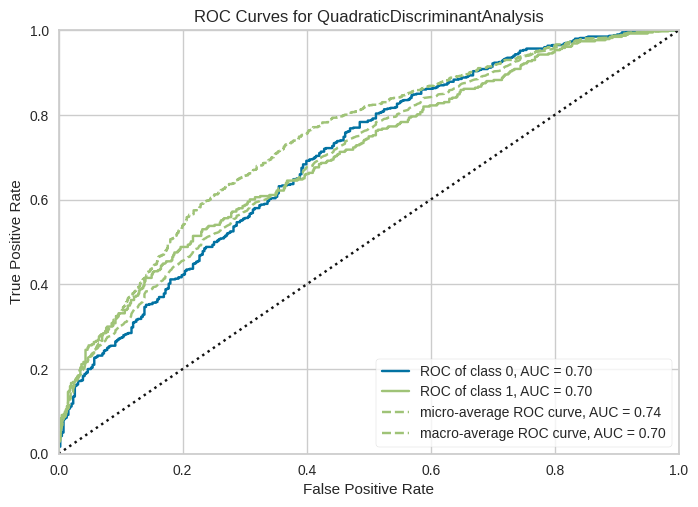

In [9]:
plot_model(best_model, plot = 'auc')

In [10]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Tunning The Model

In [11]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6913,0.6781,0.3556,0.7111,0.4741,0.2885,0.3232
1,0.6609,0.6533,0.3333,0.6250,0.4348,0.2234,0.2459
2,0.6739,0.6973,0.3444,0.6596,0.4526,0.2516,0.2786
3,0.6463,0.6404,0.2889,0.6047,0.3910,0.1835,0.2083
4,0.6245,0.6764,0.3111,0.5385,0.3944,0.1496,0.1614
5,0.6376,0.6063,0.3034,0.5625,0.3942,0.1674,0.1837
6,0.6594,0.6976,0.2809,0.6410,0.3906,0.2015,0.2346
7,0.6900,0.6527,0.3146,0.7368,0.4409,0.2715,0.3186
8,0.6769,0.7171,0.3708,0.6471,0.4714,0.2626,0.2838


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Saving The Model

In [13]:
final_et = finalize_model(tuned_model)
save_model(final_et, 'final_bc_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ph', 'Hardness', 'Solids',
                                              'Chloramines', 'Sulfate',
                                              'Conductivity', 'Organic_carbon',
                                              'Trihalomethanes', 'Turbidity'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               str...
                 ('categorical_imputer',
                  TransformerWra

# Loading The Model

In [14]:
from pycaret.regression import load_model
loaded_best_pipeline = load_model('final_bc_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ph', 'Hardness', 'Solids',
                                             'Chloramines', 'Sulfate',
                                             'Conductivity', 'Organic_carbon',
                                             'Trihalomethanes', 'Turbidity'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              str...
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                               store_covariance=False,
                                               tol=0.0001))],
         verbose=False)

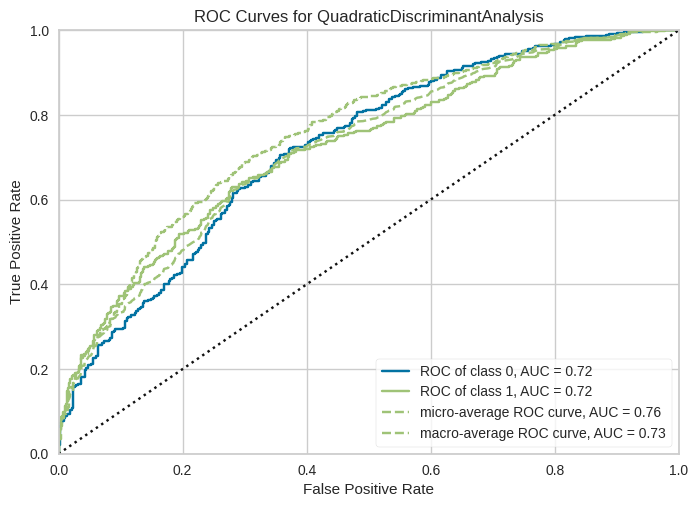

In [15]:
plot_model(loaded_best_pipeline, plot = 'auc')

In [16]:
!pip install gradio
!pip install pycaret[mlops]

In [17]:
create_app(loaded_best_pipeline)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>